In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as pd
import itertools
from pygem_eb.processing.plotting_fxns import *
from objectives import *
data_fp = '/home/claire/research/MB_data/Gulkana/Input_Gulkana_Glaciological_Data.csv'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


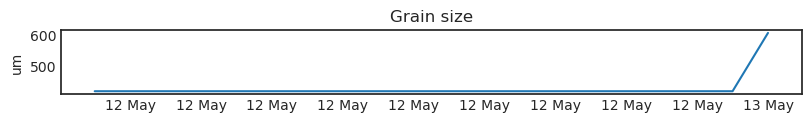

In [76]:
# site = 'AB'
# ds = xr.open_dataset(f'/home/claire/research/Output/EB/Gulkana_2024_09_19_{site}_0.nc')
# visualize_layers(ds,pd.date_range('2000-04-21','2000-06-13',freq='d'),['layertemp','layerdensity','layergrainsize'],t=f'First year snowpack at {site}',plot_firn=False)
site = 'D'
ds1 = xr.open_dataset(f'/home/claire/research/Output/EB/Gulkana_2024_09_20_{site}_18.nc')
# visualize_layers(ds1,pd.date_range('2000-04-21 06:00','2000-05-20 07:00',freq='d'),['layertemp','layergrainsize'],ylim=(2),t=f'First year snowpack at {site}',plot_firn=False)
# simple_plot(ds1,['2000-05-09','2000-05-13'],[['layergrainsize']],cumMB=False,res='h')
# compare_runs([ds,ds1],[ds.time.values[0],'2000-05-01'],['AB','D'],'layerdensity')
# compare_runs([ds,ds1],[ds.time.values[0],'2000-05-01'],['AB','D'],'layertemp')
plot_single_layer(ds1,3,['layergrainsize'],['2000-05-12 05:00','2000-05-13'])
# compare_runs([ds,ds1],[ds.time.values[0],'2000-05-01'],['AB','D'],'layergrainsize')

In [72]:
ds = xr.open_dataset('/home/claire/research/Output/EB/Gulkana_2024_09_20_D_5.nc')
ds.layergrainsize.sel(time=pd.to_datetime('2000-05-12 07:00:00')).values

array([ 156.9391796 ,  409.18067113,  418.28435082,  417.92485198,
        444.23587835,  441.7064968 ,  449.52984063,  461.86445412,
        465.4439634 , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 5000.        , 5000.        , 5000.        ,
       5000.        , 5000.        , 5000.        , 5000.        ,
       5000.        , 5000.        , 5000.        ,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan])

In [75]:
ds1.layergrainsize.sel(layer=3,time=pd.to_datetime('2000-05-12 06:00')).values 
ds1.layergrainsize.sel(layer=3,time=pd.to_datetime('2000-05-12 07:00')).values

array(417.92485198)

In [66]:
path_out = '/home/claire/research/Output/calibration/09_18/'
plot_site = 'AB'
aa = [0.4,0.5,0.6]
kk = ['VanDusen','Sturm','Douville','Jansson','OstinAndersson']
winter_result = np.ones((3,len(aa),len(kk)))
summer_result = np.ones((3,len(aa),len(kk)))
site_avg_winter = np.ones((len(aa),len(kk)))
site_avg_summer = np.ones((len(aa),len(kk)))
label = []

for i,a_ice in enumerate(aa):
    for k,k_snow in enumerate(kk):
        print(f'ksnow: {k_snow}    aice: {a_ice}')
        label.append(f'{path_out}ksnow{k_snow}_aice{a_ice}_site{plot_site}_0.nc')
        for s,site in enumerate(['AB','B','D']):
            fn = label[-1]
            try:
                ds,startdate,enddate = getds(fn)
                winter,summer = seasonal_mass_balance(data_fp,ds,site=site,method='MAE')
                winter_result[s,i,k] = winter
                summer_result[s,i,k] = summer
            except:
                winter_result[s,i,k] = np.nan
                summer_result[s,i,k] = np.nan
                print(site+' does not exist')
        site_avg_winter[i,k] = np.mean(winter_result[:,i,k])
        site_avg_summer[i,k] = np.mean(summer_result[:,i,k])
        print('summer',site_avg_summer[i,k],'winter',site_avg_winter[i,k])
best_winter = np.argmin(site_avg_winter)
best_summer = np.argmin(site_avg_summer)

print(f'Best winter run for was '+label[best_winter])
print(f'Best summer run for was '+label[best_summer])

# ds = xr.open_dataset(label[best_summer])
# fig,ax = seasonal_mass_balance(data_fp,ds,site=plot_site,plot=True)
# fig.suptitle(f'Best summer run between all sites, at site {plot_site}')
# plt.savefig(f'/home/claire/research/Output/calibration/best_summer_{plot_site}.png',dpi=200)

# ds = xr.open_dataset(label[best_winter])
# fig,ax = seasonal_mass_balance(data_fp,ds,site=plot_site,plot=True)
# fig.suptitle(f'Best winter run between all sites, at site {plot_site}')
# plt.savefig(f'/home/claire/research/Output/calibration/best_winter_{plot_site}.png',dpi=200)

ksnow: VanDusen    aice: 0.4
summer 1.181486221919674 winter 0.4168700425787477
ksnow: Sturm    aice: 0.4
summer 1.1527214445387457 winter 0.4051700915557823
ksnow: Douville    aice: 0.4
summer 1.177436574389847 winter 0.4152684099127441
ksnow: Jansson    aice: 0.4
summer 1.070429160574036 winter 0.3753571420348907
ksnow: OstinAndersson    aice: 0.4
summer 1.1756696342949584 winter 0.41693903156701745
ksnow: VanDusen    aice: 0.5
summer 1.181486221919674 winter 0.4168700425787477
ksnow: Sturm    aice: 0.5
summer 1.1527214445387457 winter 0.4051700915557823
ksnow: Douville    aice: 0.5
summer 1.0619883580949696 winter 0.3769786817900942
ksnow: Jansson    aice: 0.5
summer 1.1797786591183503 winter 0.4160961136150501
ksnow: OstinAndersson    aice: 0.5
summer 1.1756696342949584 winter 0.41693903156701745
ksnow: VanDusen    aice: 0.6
summer 1.0765404167100832 winter 0.3759379924183212
ksnow: Sturm    aice: 0.6
summer 1.0501009163072086 winter 0.36823639847291884
ksnow: Douville    aice: 0.6

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Summer MAE = 1.299   Winter MAE = 0.221'}, ylabel='Seasonal mass balance (m w.e.)'>)

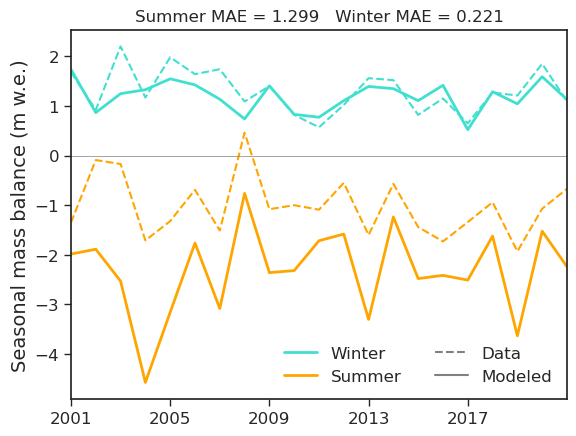

In [98]:
site = 'D'
ds = xr.open_dataset(f'/home/claire/research/Output/EB/Gulkana_2024_09_19_{site}_4.nc')
seasonal_mass_balance(data_fp,ds,site,plot=True)

In [82]:
def grid_plot(params_dict,summer_result,winter_result):
    """
    Parameters
    ----------
    params_dict : dict
        dict formatted as 'param_name':[option_1,option_2,...]
    result_summer and reuslt_winter : np.array
        should be size (N1xN2x...Nn) where:
            n is the number of param sets
            N is the number of options in each set
    """
    # Parse parameters
    param_names = list(params_dict.keys())
    combos = list(itertools.combinations(param_names,2))
    n_combos = len(combos)
    mid_idx = n_combos / 2
    if mid_idx % 1 != 0:
        mid_idx = int(mid_idx)

    # Create plot
    fig = plt.figure(figsize=(3*n_combos, 5))
    gs = fig.add_gridspec(2,n_combos, wspace=0.3,hspace=0.5)

    # Normalize RMSE values across all three plots for shared colorbar
    all_summer = summer_result[~np.isnan(summer_result)].flatten()
    
    all_winter = winter_result[~np.isnan(winter_result)].flatten()
    norm_summer = plt.Normalize(vmin=np.min(all_summer), vmax=np.max(all_summer))
    norm_winter = plt.Normalize(vmin=np.min(all_winter), vmax=np.max(all_winter))
    cmap = 'viridis_r'
    ylabels = False
    xlabels = False

    # Create the scatter plots
    for j,pair in enumerate(combos):
        param_1 = params_dict[pair[0]]
        param_2 = params_dict[pair[1]]
        if type(param_1[0]) == str:
            xlabels = param_1
            param_1 = np.arange(len(param_1))
        if type(param_2[0]) == str:
            ylabels = np.flip(param_2)
            param_2 = np.arange(len(param_2))
        x,y = np.meshgrid(param_1,param_2)
        for i,season in enumerate(['summer','winter']):
            ax = fig.add_subplot(gs[i,j])
    
            slices = [slice(None)] * n_combos
            slices[j] = mid_idx
            if n_combos > 1:
                if season == 'summer':
                    result = summer_result[tuple(slices)]
                    norm = norm_summer
                elif season == 'winter':
                    result = winter_result[tuple(slices)]
                    norm = norm_winter
            else:
                if season == 'summer':
                    result = summer_result
                    norm = norm_summer
                elif season == 'winter':
                    result = winter_result
                    norm = norm_winter
            ax.scatter(x,y,c=result,cmap=cmap,s=500,norm=norm)
            ax.set_xlabel(pair[0],fontsize=12)
            ax.set_ylabel(pair[1],fontsize=12)
            ax.set_xticks(param_1)
            ax.set_yticks(param_2)
            ax.grid(True)
            if j == n_combos - 1:
                pos = ax.yaxis.label.get_position()
                ax.text(pos[0]-0.8,pos[1],f'{season} loss',fontsize=14,ha='center', va='center', rotation='vertical', transform=ax.transAxes)
            if type(xlabels) != bool:
                ax.set_xticklabels(xlabels)
            if type(ylabels) != bool:
                ax.set_yticklabels(ylabels)

    # Add colorbars to each row
    axes = np.array(fig.get_axes()).reshape(2,n_combos)
    cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_summer, cmap=cmap), ax=axes[0,:], orientation='vertical')
    cbar.set_label('MAE')

    cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_winter, cmap=cmap),ax=axes[1,:], orientation='vertical')
    cbar.set_label('MAE')


ksnowDouville_aice0.6_siteB_0.nc


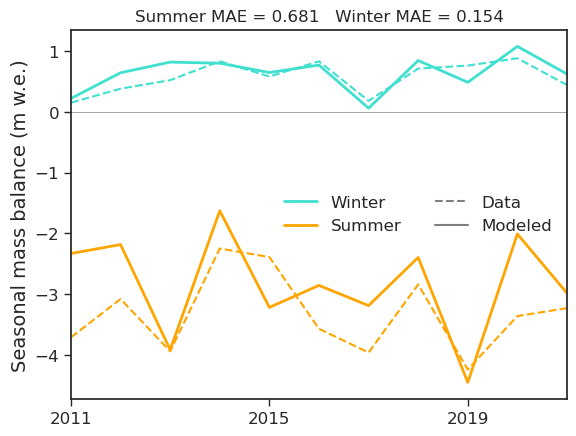

ksnowSturm_aice0.6_siteB_0.nc


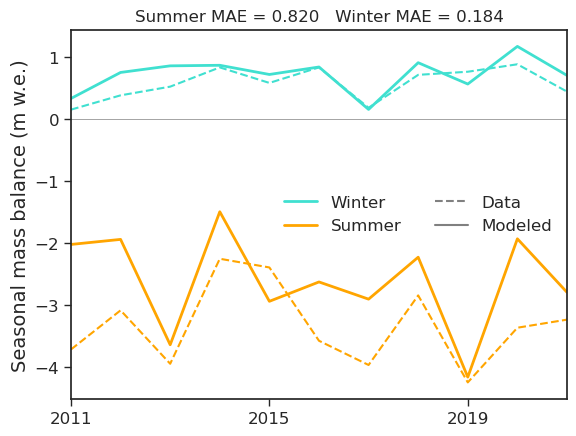

ksnowVanDusen_aice0.6_siteB_0.nc


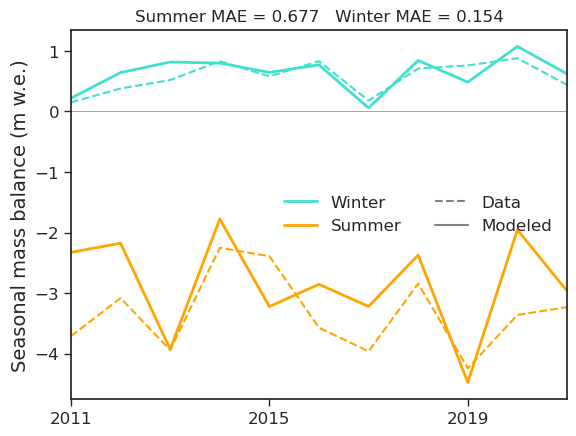

ksnowOstinAndersson_aice0.6_siteB_0.nc


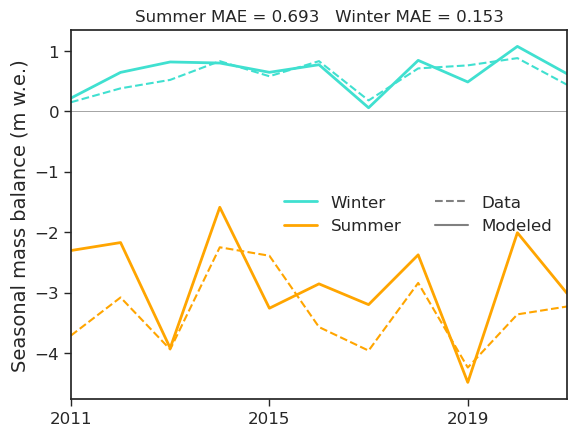

ksnowJansson_aice0.6_siteB_0.nc


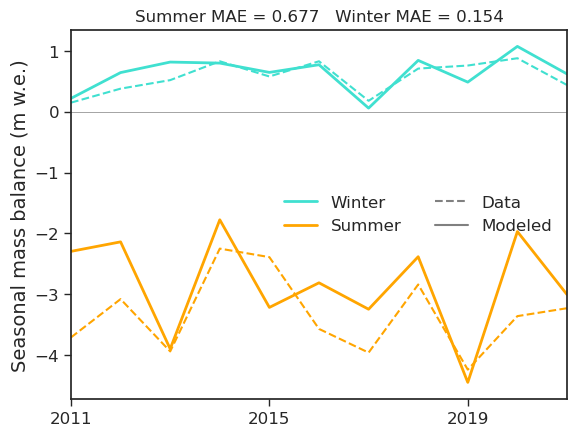

In [89]:
import os
for file in os.listdir(path_out):
    if 'siteB' in file and '0.6' in file:
        ds = xr.open_dataset(path_out+file)
        print(file)
        seasonal_mass_balance(data_fp,ds,'AB',plot=True)
        plt.show()

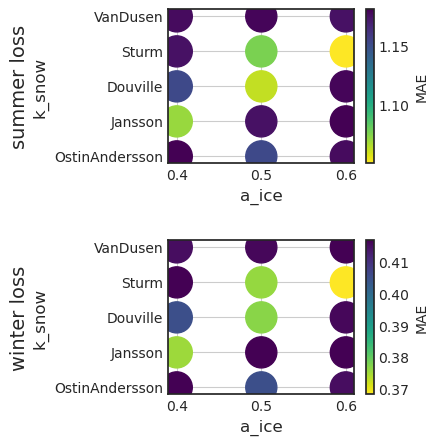

In [83]:
params_dict = {'a_ice':[0.4,0.5,0.6],
               'k_snow':['VanDusen','Sturm','Douville','Jansson','OstinAndersson']}
grid_plot(params_dict,site_avg_summer,site_avg_winter)

In [84]:
def plot_by(ds,time,vars,t='Monthly EB Outputs',by='month'):
    h = 1.5
    fig,axes = plt.subplots(len(vars),1,figsize=(7,h*len(vars)),sharex=True,layout='constrained')
    if len(vars) == 1:
        axes = [axes]
    
    if by == 'month':
        ds[by] = (['time'],pd.to_datetime(ds['time'].values).month)
        time_list = np.arange(1,13)
    elif by == 'hour':
        ds[by] = (['time'],pd.to_datetime(ds['time'].values).hour)
        time_list = np.arange(0,24)
    elif by == 'doy':
        ds[by] = (['time'],pd.to_datetime(ds['time'].values).day_of_year)
        time_list = np.arange(1,366)
        running_sum = 0

    if len(time) == 2:
        start = pd.to_datetime(time[0])
        end = pd.to_datetime(time[1])
        time = pd.date_range(start,end,freq='h')
    ds = ds.sel(time=time)
    c_iter = iter([plt.cm.Dark2(i) for i in range(8)])
    for i,v in enumerate(vars):
        axis = axes[i]
        vararray = np.array(v)
        for var in vararray:
            try:
                c = next(c_iter)
            except:
                c_iter = iter([plt.cm.Dark2(i) for i in range(8)])
                c = next(c_iter)
        
            var_out = []
            for time in time_list:
                ds_sel = ds.where(ds[by] == time,drop=True)
                if 'layer' in var:
                    vardata = ds_sel.isel(layer=0)[var].to_numpy()
                else:
                    vardata = ds_sel[var].to_numpy()
                if by == 'doy':
                    nyrs = int(vardata.shape[0] / 24)
                    try:
                        vardata = np.mean(vardata.reshape(24,nyrs),axis=0)
                    except:
                        if time != 366:
                            print('Must index dates exactly 1 year - 1 day apart')
                        vardata = np.array([0])
                    out = np.mean(vardata)
                else:
                    out = np.mean(vardata)
                var_out.append(out)
            axis.plot(time_list,var_out,label=var,color=c)
            axis.legend()
            if by == 'doy':
                axis.axvline(111,color='green')
                axis.axvline(294,color='red')
    if by == 'month':
        months = pd.date_range('2024-01-01','2024-12-31',freq='MS')
        month_names = [date.month_name()[:3] for date in months]
        axis.set_xticks(np.arange(1,13),month_names)
    if by == 'doy':
        axis.set_xlabel('Day of year')
    axis.set_ylabel('Melt (mm w.e.)')
    axis.tick_params(length=5)
    fig.suptitle(t)

In [87]:
ds = xr.open_dataset('/home/claire/research/Output/EB_local/run_2023_06_20_hourly_00.nc')
ds

<xarray.Dataset>
Dimensions:      (time: 52585, bin: 3, layer: 20)
Coordinates:
  * time         (time) datetime64[ns] 1980-04-01 ... 1986-04-01
  * bin          (bin) int64 0 1 2
  * layer        (layer) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
Data variables: (12/19)
    SWin         (time, bin) float64 ...
    SWout        (time, bin) float64 ...
    LWin         (time, bin) float64 ...
    LWout        (time, bin) float64 ...
    rain         (time, bin) float64 ...
    sensible     (time, bin) float64 ...
    ...           ...
    surftemp     (time, bin) float64 ...
    snowtemp     (time, bin, layer) float64 ...
    watercont    (time, bin, layer) float64 ...
    layerheight  (time, bin, layer) float64 ...
    snowdensity  (time, bin, layer) float64 ...
    snowdepth    (time, bin) float64 ...

Must index dates exactly 1 year - 1 day apart


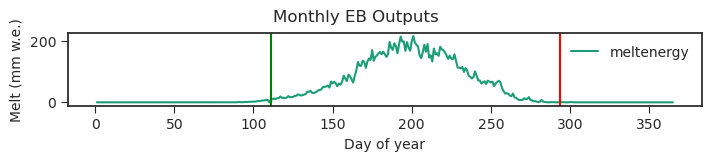

In [85]:
ds = xr.open_dataset('/home/claire/research/Output/calibration/09_18/ksnowDouville_aice0.4_siteAB_0.nc')
ds.melt.values *= 1000
plot_by(ds,[startdate,'2022-04-20'],[['meltenergy']],by='doy')

In [ ]:
ds.melt.values *= 1000
plot_by(ds,0,[startdate,enddate],[['melt']],by='doy')